In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

In [4]:
df_train.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
df_test.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


Text(0.5, 1.0, 'Distribution of Fraud')

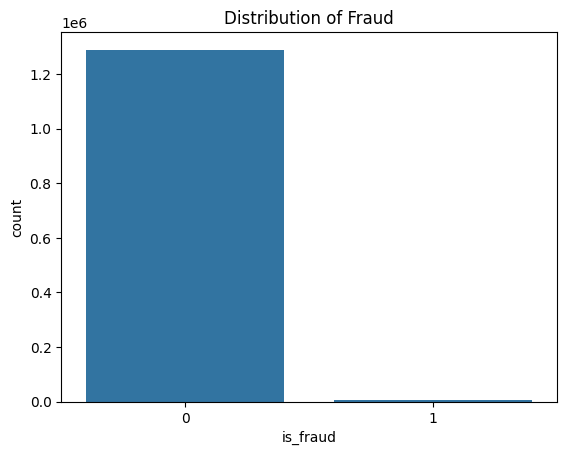

In [7]:
sns.countplot(x="is_fraud", data=df_train)
plt.title("Distribution of Fraud")

In [8]:
target = df_train['is_fraud']
test_target = df_test['is_fraud']

In [20]:
features = df_train.drop(columns=["trans_date_trans_time", "cc_num", "first", "last", "street", "city", "state", "zip", "job", "dob", "trans_num", "unix_time"], errors='ignore')

In [21]:
features = features.dropna()

In [22]:
features

,Unnamed: 0,merchant,amt,city_pop,merch_lat,merch_long,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0,"fraud_Rippin, Kub and Mann",4.97,3495,36.011293,-82.048315,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,"fraud_Heller, Gutmann and Zieme",107.23,149,49.159047,-118.186462,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,2,fraud_Lind-Buckridge,220.11,4154,43.150704,-112.154481,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3,"fraud_Kutch, Hermiston and Farrell",45.00,1939,47.034331,-112.561071,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,fraud_Keeling-Crist,41.96,99,38.674999,-78.632459,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,fraud_Reichel Inc,15.56,258,36.841266,-111.690765,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1296671,1296671,fraud_Abernathy and Sons,51.70,100,38.906881,-78.246528,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,1296672,fraud_Stiedemann Ltd,105.93,899,33.619513,-105.130529,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,1296673,"fraud_Reinger, Weissnat and Strosin",74.90,1126,42.788940,-103.241160,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
features = pd.get_dummies(features, drop_first=True)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

KeyboardInterrupt: 